In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/')

**Data Loading and Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [ ]:
# load data
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/fraud_detection_data.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#dataframe feature values description
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Test if there any missing values in DataFrame. 

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.drop_duplicates(inplace=True)

**mapping categorical values to integer values**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["type"] = ord_enc.fit_transform(df[["type"]])

In [ ]:

df["nameOrig"] = ord_enc.fit_transform(df[["nameOrig"]])
df["nameDest"] = ord_enc.fit_transform(df[["nameDest"]])

In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,181.00,1002156.0,181.0,439685.0,0.0,0.00,1
3,1,181.00,5828262.0,181.0,391696.0,21182.0,0.00,1
15,1,229133.94,6041662.0,15325.0,417183.0,5083.0,51513.44,0
19,1,215310.30,2203561.0,705.0,29714.0,22425.0,0.00,0
24,1,311685.89,3233937.0,10835.0,552201.0,6267.0,2719172.89,0


**feature selection methods**

**information gain**

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [ ]:
X = df.drop("isFraud",1)
y = df.isFraud

In [ ]:
from sklearn.feature_selection import mutual_info_classif
X=X.astype('float32')
y=y.astype('float32')
importances=mutual_info_classif(X, y, discrete_features=True)

/usr/local/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/sit

In [ ]:
importances

array([4.68873089e-03, 1.38039937e-03, 9.45706635e-03, 9.87103998e-03,
       9.68981785e-03, 8.84693967e-04, 7.31022523e-03, 3.75719688e-03,
       4.80100350e-03, 1.67313483e-05])

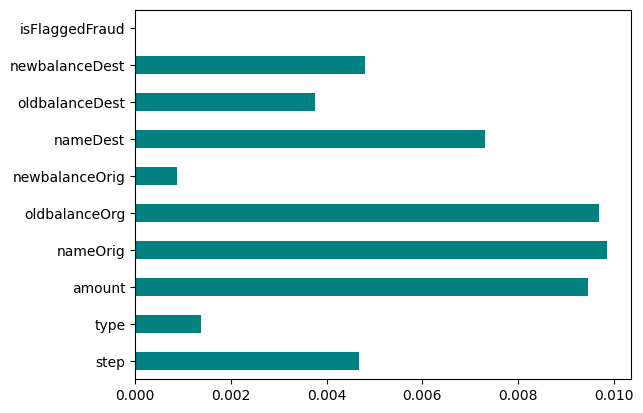

In [ ]:
feat_importances=pd.Series(importances, X.columns)
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,181.00,1002156.0,181.0,439685.0,0.0,0.00,1
3,1,181.00,5828262.0,181.0,391696.0,21182.0,0.00,1
15,1,229133.94,6041662.0,15325.0,417183.0,5083.0,51513.44,0
19,1,215310.30,2203561.0,705.0,29714.0,22425.0,0.00,0
24,1,311685.89,3233937.0,10835.0,552201.0,6267.0,2719172.89,0


**Correlation Coefficient**

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

<AxesSubplot:>

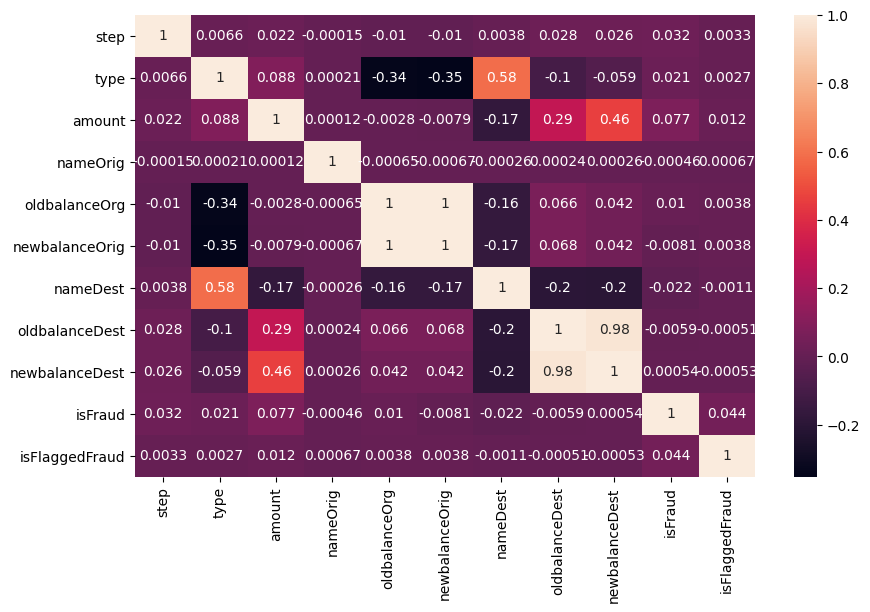

In [ ]:
# creation of correlation matrix
corrM = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrM,annot=True)

**Chi-square Test**

The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores.



In [ ]:
from sklearn.feature_selection import chi2
X = df.drop("isFraud",1)
y = df.isFraud
X=X.astype('float32')
y=y.astype('float32')
chi_scores = chi2(X,y)


In [ ]:
chi_scores

(array([5.28059079e+05, 2.93663069e+03, 7.58623617e+10, 1.44913424e+06,
        6.56309030e+09, 4.22377158e+09, 2.31449109e+09, 2.31338860e+09,
        2.00946581e+07, 1.23792173e+04]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
p_values = pd.Series(chi_scores[0],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

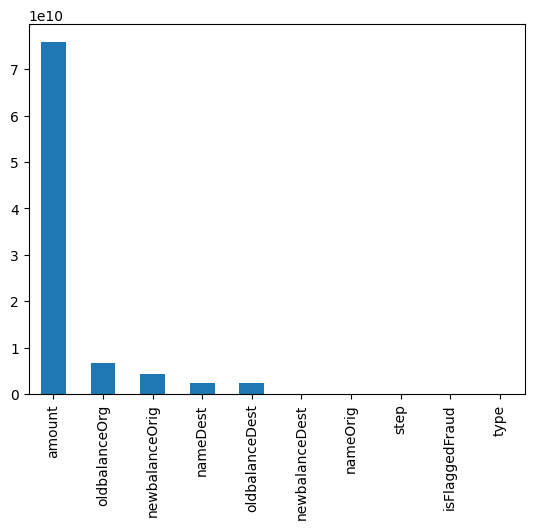

In [ ]:
p_values.plot.bar()


**Which types of transactions are fraudulent?**




We find that of the five types of transactions, fraud occurs only in two of them: 'TRANSFER' where money is sent to a customer / fraudster and 'CASH_OUT' where money is sent to a merchant who pays the customer / fraudster in cash. Remarkably, the number of fraudulent TRANSFERs almost equals the number of fraudulent CASH_OUTs. So, fraud is committed by first transferring out funds to another account which subsequently cashes it out. 

In [ ]:
print('\n The types of fraudulent transactions are {}'.format(\
list(df.loc[df.isFraud == 1].type.drop_duplicates().values))) # only 'CASH_OUT' 
                                                             # & 'TRANSFER'

dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer))) # 4097

print ('\n The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout))) # 4116


From the exploratory data analysis upper cell, we know that fraud only occurs in 'TRANSFER's and 'CASH_OUT's. So we assemble only the corresponding data in X for analysis.



---



In [ ]:
# 4.0 is represents TRANSFER and 1.0 is represents CASH_OUT
df = df.loc[(df.type == 4.0) | (df.type == 1.0)]

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,4.0,181.00,1002156.0,181.0,0.0,439685.0,0.0,0.00,1,0
3,1,1.0,181.00,5828262.0,181.0,0.0,391696.0,21182.0,0.00,1,0
15,1,1.0,229133.94,6041662.0,15325.0,0.0,417183.0,5083.0,51513.44,0,0
19,1,4.0,215310.30,2203561.0,705.0,0.0,29714.0,22425.0,0.00,0,0
24,1,4.0,311685.89,3233937.0,10835.0,0.0,552201.0,6267.0,2719172.89,0,0


In [ ]:
len(df)

2770409

**Models and Evaluation Metrics**

In [ ]:
import numpy as np
import faiss
y = df.isFraud
X = df.drop("isFraud",1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=43)
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
y_train = np.ascontiguousarray(y_train)
y_test = np.ascontiguousarray(y_test)

class FaissKNeighbors:
    def __init__(self, k=5):
        self.index = None
        self.y = None
        self.k = k

    def fit(self, X, y):
        self.index = faiss.IndexFlatL2(X.shape[1])
        self.index.add(X.astype(np.float32))
        self.y = y

    def predict(self, X):
        distances, indices = self.index.search(X.astype(np.float32), k=self.k)
        votes = self.y[indices]
        predictions = np.array([np.argmax(np.bincount(x)) for x in votes])
        return predictions

In [ ]:
fais=FaissKNeighbors(k=5)

In [ ]:
fais.fit(X_train,y_train)

In [ ]:
y_pred=fais.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))

0.8164309734792922


In [ ]:
pip install faiss-cpu

     |████████████████████████████████| 8.2MB 6.9MB/s 


In [ ]:
pip install faiss-cpu

MODEL and SCORE DEFINITIONS

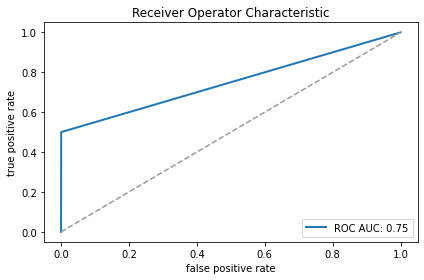

f1_score: 0.8154848101738799
precision_score: 0.9409437379980392
recall_score 0.7498914223669924
accuracy_score 0.9983399494767231
auc 0.7498914223669924
-------------------------------------
-------------------------------------
f1_score: 0.8215544496522468
precision_score: 0.9409617754689756
recall_score 0.7561414223669924
accuracy_score 0.998376037531577
auc 0.7561414223669924
-------------------------------------


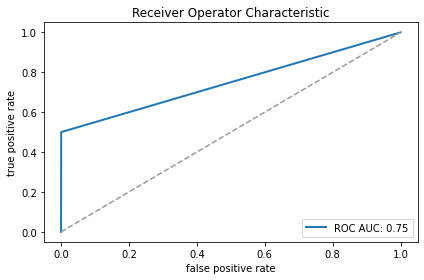

-------------------------------------
f1_score: 0.840885562831088
precision_score: 0.9312901166551205
recall_score 0.7873552298226565
accuracy_score 0.9984843016961386
auc 0.7873552298226565
-------------------------------------


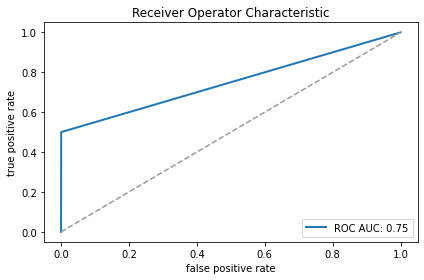

-------------------------------------
f1_score: 0.7710929375909077
precision_score: 0.9641328694779251
recall_score 0.6999457111834962
accuracy_score 0.998159509202454
auc 0.6999457111834962
-------------------------------------


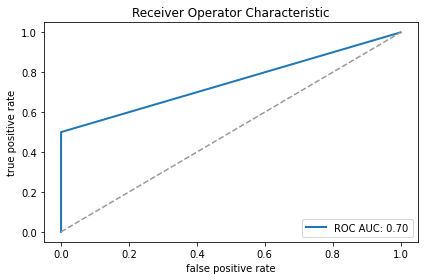

-------------------------------------
f1_score: 0.7768712017749426
precision_score: 0.9666509134581999
recall_score 0.7061957111834962
accuracy_score 0.9981955972573078
auc 0.7061957111834962
-------------------------------------
-------------------------------------


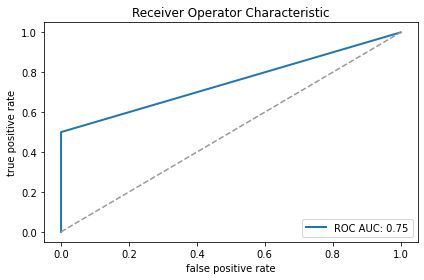

f1_score: 0.7898426224385829
precision_score: 0.9233715881332109
recall_score 0.7248914223669924
accuracy_score 0.9981955972573078
auc 0.7248914223669924
-------------------------------------


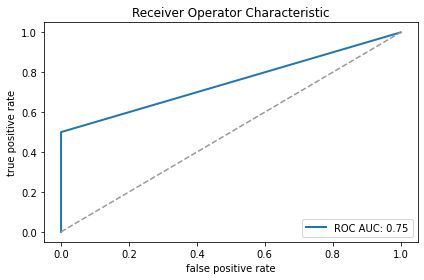

In [ ]:
# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold } for KNN

# Import Required Modules
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
import statistics
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
import matplotlib.pyplot as plt5
import matplotlib.pyplot as plt6


#Remove Least Important Features by Information Gain Feature Selection Method
df1=df.drop('isFlaggedFraud', 1)
df1=df.drop('type', 1)
df1=df.drop('newbalanceOrig', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x1 = df1.drop("isFraud",1)
# Input_ y_Target_Variable.
y1 = df1.isFraud

# Feature Scaling for input features.
x1=x1.to_numpy()
y1=y1.to_numpy()

#Remove Least Important Features by Correlation Coefficient Feature Selection Method
df2=df.drop('nameOrig', 1)
df2=df.drop('oldbalanceDest', 1)
df2=df.drop('newbalanceOrig', 1)
df2=df.drop('nameDest', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x2 = df2.drop("isFraud",1)
# Input_ y_Target_Variable.
y2 = df2.isFraud

# Feature Scaling for input features.
x2=x2.to_numpy()
y2=y2.to_numpy()


#Remove Least Important Features by Chi Square Test Feature Selection Method
df3=df.drop('nameOrig', 1)
df3=df.drop('newbalanceDest', 1)
df3=df.drop('type', 1)
df3=df.drop('step', 1)
df3=df.drop('isFlaggedFraud', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x3 = df3.drop("isFraud",1)
# Input_ y_Target_Variable.
y3 = df3.isFraud

# Feature Scaling for input features.
x3=x3.to_numpy()
y3=y3.to_numpy()


# Create StratifiedKFold object.
knn_5_IG_f1_score=[]
knn_5_IG_precision_score=[]
knn_5_IG_recall_score=[]
knn_5_IG_accuracy_score=[]
knn_5_IG_auc=[]

knn_5_CC_f1_score=[]
knn_5_CC_precision_score=[]
knn_5_CC_recall_score=[]
knn_5_CC_accuracy_score=[]
knn_5_CC_auc=[]

knn_5_CT_f1_score=[]
knn_5_CT_precision_score=[]
knn_5_CT_recall_score=[]
knn_5_CT_accuracy_score=[]
knn_5_CT_auc=[]

knn_30_IG_f1_score=[]
knn_30_IG_precision_score=[]
knn_30_IG_recall_score=[]
knn_30_IG_accuracy_score=[]
knn_30_IG_auc=[]

knn_30_CC_f1_score=[]
knn_30_CC_precision_score=[]
knn_30_CC_recall_score=[]
knn_30_CC_accuracy_score=[]
knn_30_CC_auc=[]

knn_30_CT_f1_score=[]
knn_30_CT_precision_score=[]
knn_30_CT_recall_score=[]
knn_30_CT_accuracy_score=[]
knn_30_CT_auc=[]


knn_5_IG=[]
knn_5_CC=[]
knn_5_CT=[]
knn_30_IG=[]
knn_30_CC=[]
knn_30_CT=[]

skf = StratifiedShuffleSplit(n_splits=10, test_size=0.001, random_state=1)

for train_index, test_index in skf.split(x1,y1):
    X_train, y_train = x1[train_index], y1[train_index]
    X_test, y_test = x1[test_index], y1[test_index]
    fais=FaissKNeighbors(k=5)
    fais.fit(X_train,y_train)
    y_pred=fais.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    knn_5_IG_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    knn_5_IG_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    knn_5_IG_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    knn_5_IG_accuracy_score.append(accuracy_score(y_test, y_pred))
    knn_5_IG_auc.append(auc(false_positive_rate, true_positive_rate))
    
plt.title('Receiver Operating Characteristic - KNN5/IG')
# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()
    
    
print("f1_score:",statistics.mean(knn_5_IG_f1_score))
print("precision_score:",statistics.mean(knn_5_IG_precision_score))
print("recall_score",statistics.mean(knn_5_IG_recall_score))  
print("accuracy_score",statistics.mean(knn_5_IG_accuracy_score))  
print("auc",statistics.mean(knn_5_IG_auc)) 
knn_5_IG.append(statistics.mean(knn_5_IG_f1_score))
knn_5_IG.append(statistics.mean(knn_5_IG_precision_score))
knn_5_IG.append(statistics.mean(knn_5_IG_recall_score))
knn_5_IG.append(statistics.mean(knn_5_IG_accuracy_score))
knn_5_IG.append(statistics.mean(knn_5_IG_auc))

print("-------------------------------------")


print("-------------------------------------")

for train_index, test_index in skf.split(x3,y3):
    X_train, y_train = x3[train_index], y3[train_index]
    X_test, y_test = x3[test_index], y3[test_index]
    fais=FaissKNeighbors(k=5)
    fais.fit(X_train,y_train)
    y_pred=fais.predict(X_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    knn_5_CT_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    knn_5_CT_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    knn_5_CT_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    knn_5_CT_accuracy_score.append(accuracy_score(y_test, y_pred))
    knn_5_CT_auc.append(auc(false_positive_rate, true_positive_rate))

    
print("f1_score:",statistics.mean(knn_5_CT_f1_score))
print("precision_score:",statistics.mean(knn_5_CT_precision_score))
print("recall_score",statistics.mean(knn_5_CT_recall_score)) 
print("accuracy_score",statistics.mean(knn_5_CT_accuracy_score))  
print("auc",statistics.mean(knn_5_CT_auc)) 
knn_5_CT.append(statistics.mean(knn_5_CT_f1_score))
knn_5_CT.append(statistics.mean(knn_5_CT_precision_score))
knn_5_CT.append(statistics.mean(knn_5_CT_recall_score))
knn_5_CT.append(statistics.mean(knn_5_CT_accuracy_score))
knn_5_CT.append(statistics.mean(knn_5_CT_auc))
print("-------------------------------------")

plt2.title('Receiver Operating Characteristic - KNN5/CT')
# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt2.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt2.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt2.xlim([-0.05, 1.05])
plt2.ylim([-0.05, 1.05])
plt2.xlabel('false positive rate')
plt2.ylabel('true positive rate')
plt2.title('Receiver Operator Characteristic')
plt2.legend(loc = "lower right")
plt2.tight_layout()
plt2.show()
print("-------------------------------------")


for train_index, test_index in skf.split(x2,y2):
    X_train, y_train = x2[train_index], y2[train_index]
    X_test, y_test = x2[test_index], y2[test_index]
    fais=FaissKNeighbors(k=5)
    fais.fit(X_train,y_train)
    y_pred=fais.predict(X_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    knn_5_CC_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    knn_5_CC_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    knn_5_CC_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    knn_5_CC_accuracy_score.append(accuracy_score(y_test, y_pred))
    knn_5_CC_auc.append(auc(false_positive_rate, true_positive_rate))


    
print("f1_score:",statistics.mean(knn_5_CC_f1_score))
print("precision_score:",statistics.mean(knn_5_CC_precision_score))
print("recall_score",statistics.mean(knn_5_CC_recall_score))  
print("accuracy_score",statistics.mean(knn_5_CC_accuracy_score))  
print("auc",statistics.mean(knn_5_CC_auc)) 
knn_5_CC.append(statistics.mean(knn_5_CC_f1_score))
knn_5_CC.append(statistics.mean(knn_5_CC_precision_score))
knn_5_CC.append(statistics.mean(knn_5_CC_recall_score))
knn_5_CC.append(statistics.mean(knn_5_CC_accuracy_score))
knn_5_CC.append(statistics.mean(knn_5_CC_auc))
print("-------------------------------------")

plt3.title('Receiver Operating Characteristic - KNN5/CC')

# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt3.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt3.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt3.xlim([-0.05, 1.05])
plt3.ylim([-0.05, 1.05])
plt3.xlabel('false positive rate')
plt3.ylabel('true positive rate')
plt3.title('Receiver Operator Characteristic')
plt3.legend(loc = "lower right")
plt3.tight_layout()
plt3.show()
print("-------------------------------------")

for train_index, test_index in skf.split(x1,y1):
    X_train, y_train = x1[train_index], y1[train_index]
    X_test, y_test = x1[test_index], y1[test_index]
    fais=FaissKNeighbors(k=30)
    fais.fit(X_train,y_train)
    y_pred=fais.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    knn_30_IG_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    knn_30_IG_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    knn_30_IG_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    knn_30_IG_accuracy_score.append(accuracy_score(y_test, y_pred))
    knn_30_IG_auc.append(auc(false_positive_rate, true_positive_rate))

    
print("f1_score:",statistics.mean(knn_30_IG_f1_score))
print("precision_score:",statistics.mean(knn_30_IG_precision_score))
print("recall_score",statistics.mean(knn_30_IG_recall_score)) 
print("accuracy_score",statistics.mean(knn_30_IG_accuracy_score))  
print("auc",statistics.mean(knn_30_IG_auc)) 
knn_30_IG.append(statistics.mean(knn_30_IG_f1_score))
knn_30_IG.append(statistics.mean(knn_30_IG_precision_score))
knn_30_IG.append(statistics.mean(knn_30_IG_recall_score))
knn_30_IG.append(statistics.mean(knn_30_IG_accuracy_score))
knn_30_IG.append(statistics.mean(knn_30_IG_auc))
print("-------------------------------------")

plt4.title('Receiver Operating Characteristic - KNN30/IG')

# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt4.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt4.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt4.xlim([-0.05, 1.05])
plt4.ylim([-0.05, 1.05])
plt4.xlabel('false positive rate')
plt4.ylabel('true positive rate')
plt4.title('Receiver Operator Characteristic')
plt4.legend(loc = "lower right")
plt4.tight_layout()
plt4.show()
print("-------------------------------------")


for train_index, test_index in skf.split(x3,y3):
    X_train, y_train = x3[train_index], y3[train_index]
    X_test, y_test = x3[test_index], y3[test_index]
    fais=FaissKNeighbors(k=30)
    fais.fit(X_train,y_train)
    y_pred=fais.predict(X_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    knn_30_CT_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    knn_30_CT_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    knn_30_CT_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    knn_30_CT_accuracy_score.append(accuracy_score(y_test, y_pred))
    knn_30_CT_auc.append(auc(false_positive_rate, true_positive_rate))

    
print("f1_score:",statistics.mean(knn_30_CT_f1_score))
print("precision_score:",statistics.mean(knn_30_CT_precision_score))
print("recall_score",statistics.mean(knn_30_CT_recall_score)) 
print("accuracy_score",statistics.mean(knn_30_CT_accuracy_score))  
print("auc",statistics.mean(knn_30_CT_auc)) 
knn_30_CT.append(statistics.mean(knn_30_CT_f1_score))
knn_30_CT.append(statistics.mean(knn_30_CT_precision_score))
knn_30_CT.append(statistics.mean(knn_30_CT_recall_score))
knn_30_CT.append(statistics.mean(knn_30_CT_accuracy_score))
knn_30_CT.append(statistics.mean(knn_30_CT_auc))
print("-------------------------------------")


print("-------------------------------------")

plt5.title('Receiver Operating Characteristic - KNN30/CT')
# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt5.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt5.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt5.xlim([-0.05, 1.05])
plt5.ylim([-0.05, 1.05])
plt5.xlabel('false positive rate')
plt5.ylabel('true positive rate')
plt5.title('Receiver Operator Characteristic')
plt5.legend(loc = "lower right")
plt5.tight_layout()
plt5.show()



for train_index, test_index in skf.split(x2,y2):
    X_train, y_train = x2[train_index], y2[train_index]
    X_test, y_test = x2[test_index], y2[test_index]
    fais=FaissKNeighbors(k=30)
    fais.fit(X_train,y_train)
    y_pred=fais.predict(X_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    knn_30_CC_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    knn_30_CC_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    knn_30_CC_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    knn_30_CC_accuracy_score.append(accuracy_score(y_test, y_pred))
    knn_30_CC_auc.append(auc(false_positive_rate, true_positive_rate))


    
print("f1_score:",statistics.mean(knn_30_CC_f1_score))
print("precision_score:",statistics.mean(knn_30_CC_precision_score))
print("recall_score",statistics.mean(knn_30_CC_recall_score))
print("accuracy_score",statistics.mean(knn_30_CC_accuracy_score))  
print("auc",statistics.mean(knn_30_CC_auc)) 
knn_30_CC.append(statistics.mean(knn_30_CC_f1_score))
knn_30_CC.append(statistics.mean(knn_30_CC_precision_score))
knn_30_CC.append(statistics.mean(knn_30_CC_recall_score))
knn_30_CC.append(statistics.mean(knn_30_CC_accuracy_score))
knn_30_CC.append(statistics.mean(knn_30_CC_auc))
print("-------------------------------------")



plt6.title('Receiver Operating Characteristic - KNN30/CC')
# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt6.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt6.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt6.xlim([-0.05, 1.05])
plt6.ylim([-0.05, 1.05])
plt6.xlabel('false positive rate')
plt6.ylabel('true positive rate')
plt6.title('Receiver Operator Characteristic')
plt6.legend(loc = "lower right")
plt6.tight_layout()
plt6.show()



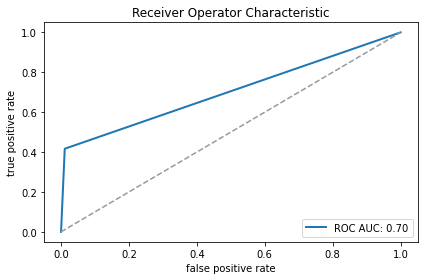

f1_score: 0.5794363740446421
precision_score: 0.5505534666310475
recall_score 0.7044239780979186
accuracy_score 0.9874285755537989
auc 0.7044239780979186
-------------------------------------
-------------------------------------
f1_score: 0.5624611556892881
precision_score: 0.538892527825947
recall_score 0.6928297703264119
accuracy_score 0.984529365689555
auc 0.6928297703264119
-------------------------------------


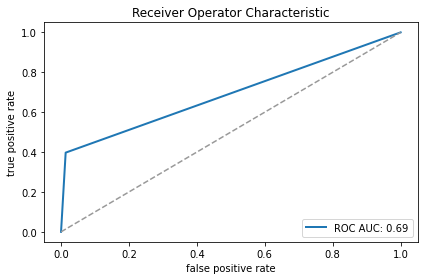

-------------------------------------
f1_score: 0.5624448718361692
precision_score: 0.5388830197375291
recall_score 0.6927692310168482
accuracy_score 0.9845297266469584
auc 0.6927692310168482
-------------------------------------


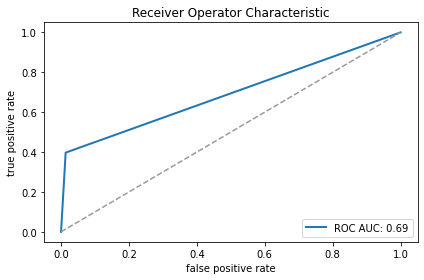

-------------------------------------


In [ ]:
# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold } for Naive Bayes

# Import Required Modules
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
import statistics
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
import matplotlib.pyplot as plt5
import matplotlib.pyplot as plt6


#Remove Least Important Features by Information Gain Feature Selection Method
df1=df.drop('isFlaggedFraud', 1)
df1=df.drop('type', 1)
df1=df.drop('newbalanceOrig', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x1 = df1.drop("isFraud",1)
# Input_ y_Target_Variable.
y1 = df1.isFraud

# Feature Scaling for input features.
x1=x1.to_numpy()
y1=y1.to_numpy()

#Remove Least Important Features by Correlation Coefficient Feature Selection Method
df2=df.drop('nameOrig', 1)
df2=df.drop('oldbalanceDest', 1)
df2=df.drop('newbalanceOrig', 1)
df2=df.drop('nameDest', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x2 = df2.drop("isFraud",1)
# Input_ y_Target_Variable.
y2 = df2.isFraud

# Feature Scaling for input features.
x2=x2.to_numpy()
y2=y2.to_numpy()


#Remove Least Important Features by Chi Square Test Feature Selection Method
df3=df.drop('nameOrig', 1)
df3=df.drop('newbalanceDest', 1)
df3=df.drop('type', 1)
df3=df.drop('step', 1)
df3=df.drop('isFlaggedFraud', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x3 = df3.drop("isFraud",1)
# Input_ y_Target_Variable.
y3 = df3.isFraud

# Feature Scaling for input features.
x3=x3.to_numpy()
y3=y3.to_numpy()


# Create StratifiedKFold object.
naive_bayes_IG_f1_score=[]
naive_bayes_IG_precision_score=[]
naive_bayes_IG_recall_score=[]
naive_bayes_IG_accuracy_score=[]
naive_bayes_IG_auc=[]

naive_bayes_CC_f1_score=[]
naive_bayes_CC_precision_score=[]
naive_bayes_CC_recall_score=[]
naive_bayes_CC_accuracy_score=[]
naive_bayes_CC_auc=[]

naive_bayes_CT_f1_score=[]
naive_bayes_CT_precision_score=[]
naive_bayes_CT_recall_score=[]
naive_bayes_CT_accuracy_score=[]
naive_bayes_CT_auc=[]



naive_bayes_IG=[]
naive_bayes_CC=[]
naive_bayes_CT=[]


skf = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=1)

for train_index, test_index in skf.split(x1,y1):
    X_train, y_train = x1[train_index], y1[train_index]
    X_test, y_test = x1[test_index], y1[test_index]
    
    gs_NB = GaussianNB(var_smoothing=1e-07)
    gs_NB.fit(X_train, y_train)
    y_pred=gs_NB.predict(X_test) 

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    naive_bayes_IG_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    naive_bayes_IG_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    naive_bayes_IG_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    naive_bayes_IG_accuracy_score.append(accuracy_score(y_test, y_pred))
    naive_bayes_IG_auc.append(auc(false_positive_rate, true_positive_rate))
    
plt.title('Receiver Operating Characteristic - naive_bayes/IG')
# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()
    
    
print("f1_score:",statistics.mean(naive_bayes_IG_f1_score))
print("precision_score:",statistics.mean(naive_bayes_IG_precision_score))
print("recall_score",statistics.mean(naive_bayes_IG_recall_score))  
print("accuracy_score",statistics.mean(naive_bayes_IG_accuracy_score))  
print("auc",statistics.mean(naive_bayes_IG_auc)) 
naive_bayes_IG.append(statistics.mean(naive_bayes_IG_f1_score))
naive_bayes_IG.append(statistics.mean(naive_bayes_IG_precision_score))
naive_bayes_IG.append(statistics.mean(naive_bayes_IG_recall_score))
naive_bayes_IG.append(statistics.mean(naive_bayes_IG_accuracy_score))
naive_bayes_IG.append(statistics.mean(naive_bayes_IG_auc))

print("-------------------------------------")


print("-------------------------------------")

for train_index, test_index in skf.split(x3,y3):
    X_train, y_train = x3[train_index], y3[train_index]
    X_test, y_test = x3[test_index], y3[test_index]
    
    gs_NB = GaussianNB(var_smoothing=1e-07)
    gs_NB.fit(X_train, y_train)
    y_pred=gs_NB.predict(X_test) 


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    naive_bayes_CT_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    naive_bayes_CT_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    naive_bayes_CT_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    naive_bayes_CT_accuracy_score.append(accuracy_score(y_test, y_pred))
    naive_bayes_CT_auc.append(auc(false_positive_rate, true_positive_rate))

    
print("f1_score:",statistics.mean(naive_bayes_CT_f1_score))
print("precision_score:",statistics.mean(naive_bayes_CT_precision_score))
print("recall_score",statistics.mean(naive_bayes_CT_recall_score)) 
print("accuracy_score",statistics.mean(naive_bayes_CT_accuracy_score))  
print("auc",statistics.mean(naive_bayes_CT_auc)) 
naive_bayes_CT.append(statistics.mean(naive_bayes_CT_f1_score))
naive_bayes_CT.append(statistics.mean(naive_bayes_CT_precision_score))
naive_bayes_CT.append(statistics.mean(naive_bayes_CT_recall_score))
naive_bayes_CT.append(statistics.mean(naive_bayes_CT_accuracy_score))
naive_bayes_CT.append(statistics.mean(naive_bayes_CT_auc))
print("-------------------------------------")

plt2.title('Receiver Operating Characteristic - naive_bayes/CT')
# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt2.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt2.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt2.xlim([-0.05, 1.05])
plt2.ylim([-0.05, 1.05])
plt2.xlabel('false positive rate')
plt2.ylabel('true positive rate')
plt2.title('Receiver Operator Characteristic')
plt2.legend(loc = "lower right")
plt2.tight_layout()
plt2.show()
print("-------------------------------------")


for train_index, test_index in skf.split(x2,y2):
    X_train, y_train = x2[train_index], y2[train_index]
    X_test, y_test = x2[test_index], y2[test_index]
    
    gs_NB = GaussianNB(var_smoothing=1e-07)
    gs_NB.fit(X_train, y_train)
    y_pred=gs_NB.predict(X_test) 


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    naive_bayes_CC_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    naive_bayes_CC_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    naive_bayes_CC_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    naive_bayes_CC_accuracy_score.append(accuracy_score(y_test, y_pred))
    naive_bayes_CC_auc.append(auc(false_positive_rate, true_positive_rate))


    
print("f1_score:",statistics.mean(naive_bayes_CC_f1_score))
print("precision_score:",statistics.mean(naive_bayes_CC_precision_score))
print("recall_score",statistics.mean(naive_bayes_CC_recall_score))  
print("accuracy_score",statistics.mean(naive_bayes_CC_accuracy_score))  
print("auc",statistics.mean(naive_bayes_CC_auc)) 
naive_bayes_CC.append(statistics.mean(naive_bayes_CC_f1_score))
naive_bayes_CC.append(statistics.mean(naive_bayes_CC_precision_score))
naive_bayes_CC.append(statistics.mean(naive_bayes_CC_recall_score))
naive_bayes_CC.append(statistics.mean(naive_bayes_CC_accuracy_score))
naive_bayes_CC.append(statistics.mean(naive_bayes_CC_auc))
print("-------------------------------------")

plt3.title('Receiver Operating Characteristic - naive_bayes/CC')

# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt3.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt3.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt3.xlim([-0.05, 1.05])
plt3.ylim([-0.05, 1.05])
plt3.xlabel('false positive rate')
plt3.ylabel('true positive rate')
plt3.title('Receiver Operator Characteristic')
plt3.legend(loc = "lower right")
plt3.tight_layout()
plt3.show()
print("-------------------------------------")



In [ ]:
! pip install -q scikit-plot
import scikitplot as skplt

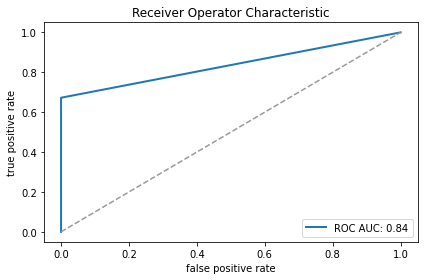

f1_score: 0.8950951903423794
precision_score: 0.9893396080954238
recall_score 0.8315264393216549
accuracy_score 0.9989608036355629
auc 0.8315264393216549
-------------------------------------
-------------------------------------
f1_score: 0.8950951903423794
precision_score: 0.9893396080954238
recall_score 0.8315264393216549
accuracy_score 0.9989608036355629
auc 0.8315264393216549
-------------------------------------


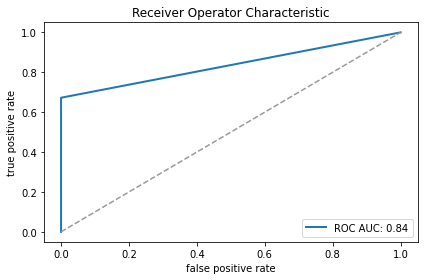

-------------------------------------
f1_score: 0.8950951903423794
precision_score: 0.9893396080954238
recall_score 0.8315264393216549
accuracy_score 0.9989608036355629
auc 0.8315264393216549
-------------------------------------


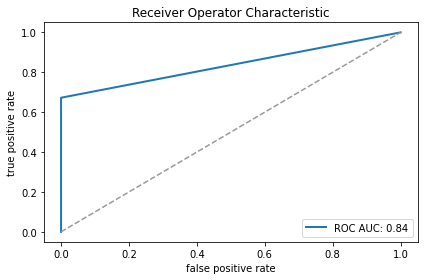

-------------------------------------
f1_score: 0.8912213289903481
precision_score: 0.9868017626103001
recall_score 0.8272584581250042
accuracy_score 0.9989257907674315
auc 0.8272584581250042
-------------------------------------


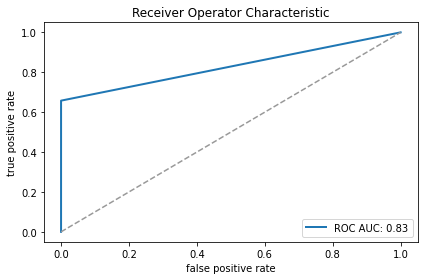

-------------------------------------
f1_score: 0.8912213289903481
precision_score: 0.9868017626103001
recall_score 0.8272584581250042
accuracy_score 0.9989257907674315
auc 0.8272584581250042
-------------------------------------
-------------------------------------


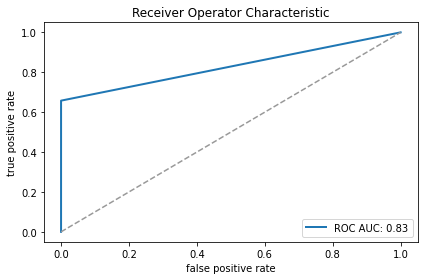

f1_score: 0.8912499564006279
precision_score: 0.9868905192133276
recall_score 0.8272586391401371
accuracy_score 0.9989261517248349
auc 0.8272586391401371
-------------------------------------


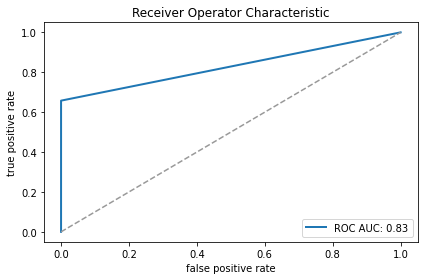

In [ ]:
# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold } for Decision Tree Classifier

# Import Required Modules
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import statistics
import seaborn as sn
import matplotlib.pyplot as plt     
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
import matplotlib.pyplot as plt5
import matplotlib.pyplot as plt6
import scikitplot as skplt


#Remove Least Important Features by Information Gain Feature Selection Method
df1=df.drop('isFlaggedFraud', 1)
df1=df.drop('type', 1)
df1=df.drop('newbalanceOrig', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x1 = df1.drop("isFraud",1)
# Input_ y_Target_Variable.
y1 = df1.isFraud

# Feature Scaling for input features.
x1=x1.to_numpy()
y1=y1.to_numpy()

#Remove Least Important Features by Correlation Coefficient Feature Selection Method
df2=df.drop('nameOrig', 1)
df2=df.drop('oldbalanceDest', 1)
df2=df.drop('newbalanceOrig', 1)
df2=df.drop('nameDest', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x2 = df2.drop("isFraud",1)
# Input_ y_Target_Variable.
y2 = df2.isFraud

# Feature Scaling for input features.
x2=x2.to_numpy()
y2=y2.to_numpy()


#Remove Least Important Features by Chi Square Test Feature Selection Method
df3=df.drop('nameOrig', 1)
df3=df.drop('newbalanceDest', 1)
df3=df.drop('type', 1)
df3=df.drop('step', 1)
df3=df.drop('isFlaggedFraud', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x3 = df3.drop("isFraud",1)
# Input_ y_Target_Variable.
y3 = df3.isFraud

# Feature Scaling for input features.
x3=x3.to_numpy()
y3=y3.to_numpy()


# Create StratifiedKFold object.
DC_entropy_IG_f1_score=[]
DC_entropy_IG_precision_score=[]
DC_entropy_IG_recall_score=[]
DC_entropy_IG_accuracy_score=[]
DC_entropy_IG_auc=[]

DC_entropy_CC_f1_score=[]
DC_entropy_CC_precision_score=[]
DC_entropy_CC_recall_score=[]
DC_entropy_CC_accuracy_score=[]
DC_entropy_CC_auc=[]

DC_entropy_CT_f1_score=[]
DC_entropy_CT_precision_score=[]
DC_entropy_CT_recall_score=[]
DC_entropy_CT_accuracy_score=[]
DC_entropy_CT_auc=[]

DC_gini_IG_f1_score=[]
DC_gini_IG_precision_score=[]
DC_gini_IG_recall_score=[]
DC_gini_IG_accuracy_score=[]
DC_gini_IG_auc=[]

DC_gini_CC_f1_score=[]
DC_gini_CC_precision_score=[]
DC_gini_CC_recall_score=[]
DC_gini_CC_accuracy_score=[]
DC_gini_CC_auc=[]

DC_gini_CT_f1_score=[]
DC_gini_CT_precision_score=[]
DC_gini_CT_recall_score=[]
DC_gini_CT_accuracy_score=[]
DC_gini_CT_auc=[]



DC_gini_IG=[]
DC_gini_CC=[]
DC_gini_CT=[]
DC_entropy_IG=[]
DC_entropy_CC=[]
DC_entropy_CT=[]

skf = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42)

for train_index, test_index in skf.split(x1,y1):
    X_train, y_train = x1[train_index], y1[train_index]
    X_test, y_test = x1[test_index], y1[test_index]
    clf=DecisionTreeClassifier(criterion="entropy", max_depth=4)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    
    
    DC_entropy_IG_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    DC_entropy_IG_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    DC_entropy_IG_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    DC_entropy_IG_accuracy_score.append(accuracy_score(y_test, y_pred))
    DC_entropy_IG_auc.append(auc(false_positive_rate, true_positive_rate))




plt.title('Receiver Operating Characteristic -  DC_entropy_/IG')
# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()
    
    
print("f1_score:",statistics.mean(DC_entropy_IG_f1_score))
print("precision_score:",statistics.mean( DC_entropy_IG_precision_score))
print("recall_score",statistics.mean( DC_entropy_IG_recall_score))  
print("accuracy_score",statistics.mean( DC_entropy_IG_accuracy_score))  
print("auc",statistics.mean(DC_entropy_IG_auc)) 
DC_entropy_IG.append(statistics.mean(DC_entropy_IG_f1_score))
DC_entropy_IG.append(statistics.mean(DC_entropy_IG_precision_score))
DC_entropy_IG.append(statistics.mean(DC_entropy_IG_recall_score))
DC_entropy_IG.append(statistics.mean(DC_entropy_IG_accuracy_score))
DC_entropy_IG.append(statistics.mean(DC_entropy_IG_auc))

print("-------------------------------------")




print("-------------------------------------")

for train_index, test_index in skf.split(x3,y3):
    X_train, y_train = x3[train_index], y3[train_index]
    X_test, y_test = x3[test_index], y3[test_index]
    clf=DecisionTreeClassifier(criterion="entropy", max_depth=4)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    DC_entropy_CT_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    DC_entropy_CT_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    DC_entropy_CT_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    DC_entropy_CT_accuracy_score.append(accuracy_score(y_test, y_pred))
    DC_entropy_CT_auc.append(auc(false_positive_rate, true_positive_rate))



    
print("f1_score:",statistics.mean(DC_entropy_CT_f1_score))
print("precision_score:",statistics.mean(DC_entropy_CT_precision_score))
print("recall_score",statistics.mean(DC_entropy_CT_recall_score)) 
print("accuracy_score",statistics.mean(DC_entropy_CT_accuracy_score))  
print("auc",statistics.mean(DC_entropy_CT_auc)) 
DC_entropy_CT.append(statistics.mean(DC_entropy_CT_f1_score))
DC_entropy_CT.append(statistics.mean(DC_entropy_CT_precision_score))
DC_entropy_CT.append(statistics.mean(DC_entropy_CT_recall_score))
DC_entropy_CT.append(statistics.mean(DC_entropy_CT_accuracy_score))
DC_entropy_CT.append(statistics.mean(DC_entropy_CT_auc))
print("-------------------------------------")




plt2.title('Receiver Operating Characteristic - KNN5/CT')
# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt2.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt2.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt2.xlim([-0.05, 1.05])
plt2.ylim([-0.05, 1.05])
plt2.xlabel('false positive rate')
plt2.ylabel('true positive rate')
plt2.title('Receiver Operator Characteristic')
plt2.legend(loc = "lower right")
plt2.tight_layout()
plt2.show()
print("-------------------------------------")


for train_index, test_index in skf.split(x2,y2):
    X_train, y_train = x2[train_index], y2[train_index]
    X_test, y_test = x2[test_index], y2[test_index]
    clf=DecisionTreeClassifier(criterion="entropy", max_depth=4)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    DC_entropy_CC_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    DC_entropy_CC_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    DC_entropy_CC_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    DC_entropy_CC_accuracy_score.append(accuracy_score(y_test, y_pred))
    DC_entropy_CC_auc.append(auc(false_positive_rate, true_positive_rate))

    
print("f1_score:",statistics.mean(DC_entropy_CC_f1_score))
print("precision_score:",statistics.mean(DC_entropy_CC_precision_score))
print("recall_score",statistics.mean(DC_entropy_CC_recall_score))  
print("accuracy_score",statistics.mean(DC_entropy_CC_accuracy_score))  
print("auc",statistics.mean(DC_entropy_CC_auc)) 
DC_entropy_CC.append(statistics.mean(DC_entropy_CC_f1_score))
DC_entropy_CC.append(statistics.mean(DC_entropy_CC_precision_score))
DC_entropy_CC.append(statistics.mean(DC_entropy_CC_recall_score))
DC_entropy_CC.append(statistics.mean(DC_entropy_CC_accuracy_score))
DC_entropy_CC.append(statistics.mean(DC_entropy_CC_auc))
print("-------------------------------------")




plt3.title('Receiver Operating Characteristic - DC_entropy_/CC')

# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt3.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt3.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt3.xlim([-0.05, 1.05])
plt3.ylim([-0.05, 1.05])
plt3.xlabel('false positive rate')
plt3.ylabel('true positive rate')
plt3.title('Receiver Operator Characteristic')
plt3.legend(loc = "lower right")
plt3.tight_layout()
plt3.show()
print("-------------------------------------")

for train_index, test_index in skf.split(x1,y1):
    X_train, y_train = x1[train_index], y1[train_index]
    X_test, y_test = x1[test_index], y1[test_index]
    clf=DecisionTreeClassifier(criterion="gini", max_depth=4)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    
    DC_gini_IG_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    DC_gini_IG_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    DC_gini_IG_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    DC_gini_IG_accuracy_score.append(accuracy_score(y_test, y_pred))
    DC_gini_IG_auc.append(auc(false_positive_rate, true_positive_rate))


print("f1_score:",statistics.mean(DC_gini_IG_f1_score))
print("precision_score:",statistics.mean(DC_gini_IG_precision_score))
print("recall_score",statistics.mean(DC_gini_IG_recall_score)) 
print("accuracy_score",statistics.mean(DC_gini_IG_accuracy_score))  
print("auc",statistics.mean(DC_gini_IG_auc)) 
DC_gini_IG.append(statistics.mean(DC_gini_IG_f1_score))
DC_gini_IG.append(statistics.mean(DC_gini_IG_precision_score))
DC_gini_IG.append(statistics.mean(DC_gini_IG_recall_score))
DC_gini_IG.append(statistics.mean(DC_gini_IG_accuracy_score))
DC_gini_IG.append(statistics.mean(DC_gini_IG_auc))
print("-------------------------------------")



plt4.title('Receiver Operating Characteristic - DC_gini/IG')

# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt4.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt4.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt4.xlim([-0.05, 1.05])
plt4.ylim([-0.05, 1.05])
plt4.xlabel('false positive rate')
plt4.ylabel('true positive rate')
plt4.title('Receiver Operator Characteristic')
plt4.legend(loc = "lower right")
plt4.tight_layout()
plt4.show()
print("-------------------------------------")


for train_index, test_index in skf.split(x3,y3):
    X_train, y_train = x3[train_index], y3[train_index]
    X_test, y_test = x3[test_index], y3[test_index]
    clf=DecisionTreeClassifier(criterion="gini", max_depth=4)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    DC_gini_CT_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    DC_gini_CT_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    DC_gini_CT_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    DC_gini_CT_accuracy_score.append(accuracy_score(y_test, y_pred))
    DC_gini_CT_auc.append(auc(false_positive_rate, true_positive_rate))


    
print("f1_score:",statistics.mean(DC_gini_CT_f1_score))
print("precision_score:",statistics.mean(DC_gini_CT_precision_score))
print("recall_score",statistics.mean(DC_gini_CT_recall_score)) 
print("accuracy_score",statistics.mean(DC_gini_CT_accuracy_score))  
print("auc",statistics.mean(DC_gini_CT_auc)) 
DC_gini_CT.append(statistics.mean(DC_gini_CT_f1_score))
DC_gini_CT.append(statistics.mean(DC_gini_CT_precision_score))
DC_gini_CT.append(statistics.mean(DC_gini_CT_recall_score))
DC_gini_CT.append(statistics.mean(DC_gini_CT_accuracy_score))
DC_gini_CT.append(statistics.mean(DC_gini_CT_auc))
print("-------------------------------------")


print("-------------------------------------")




plt5.title('Receiver Operating Characteristic - DC_gini/CT')
# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt5.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt5.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt5.xlim([-0.05, 1.05])
plt5.ylim([-0.05, 1.05])
plt5.xlabel('false positive rate')
plt5.ylabel('true positive rate')
plt5.title('Receiver Operator Characteristic')
plt5.legend(loc = "lower right")
plt5.tight_layout()
plt5.show()



for train_index, test_index in skf.split(x2,y2):
    X_train, y_train = x2[train_index], y2[train_index]
    X_test, y_test = x2[test_index], y2[test_index]
    clf=DecisionTreeClassifier(criterion="gini", max_depth=4)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    DC_gini_CC_f1_score.append(f1_score(y_test, y_pred, average="macro"))
    DC_gini_CC_precision_score.append(precision_score(y_test, y_pred, average="macro"))
    DC_gini_CC_recall_score.append(recall_score(y_test, y_pred, average="macro"))
    DC_gini_CC_accuracy_score.append(accuracy_score(y_test, y_pred))
    DC_gini_CC_auc.append(auc(false_positive_rate, true_positive_rate))

    
print("f1_score:",statistics.mean(DC_gini_CC_f1_score))
print("precision_score:",statistics.mean(DC_gini_CC_precision_score))
print("recall_score",statistics.mean(DC_gini_CC_recall_score))
print("accuracy_score",statistics.mean(DC_gini_CC_accuracy_score))  
print("auc",statistics.mean(DC_gini_CC_auc)) 
DC_gini_CC.append(statistics.mean(DC_gini_CC_f1_score))
DC_gini_CC.append(statistics.mean(DC_gini_CC_precision_score))
DC_gini_CC.append(statistics.mean(DC_gini_CC_recall_score))
DC_gini_CC.append(statistics.mean(DC_gini_CC_accuracy_score))
DC_gini_CC.append(statistics.mean(DC_gini_CC_auc))
print("-------------------------------------")




plt6.title('Receiver Operating Characteristic - DC_gini/CC')
# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt6.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt6.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt6.xlim([-0.05, 1.05])
plt6.ylim([-0.05, 1.05])
plt6.xlabel('false positive rate')
plt6.ylabel('true positive rate')
plt6.title('Receiver Operator Characteristic')
plt6.legend(loc = "lower right")
plt6.tight_layout()
plt6.show()



In [ ]:
#confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
y_test, 
y_pred,
figsize=(5,5))

In [ ]:
# Import writer class from csv module
from csv import writer
with open('t_test_sc.csv', 'a') as f_object:
  
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
  
    # Pass the list as an argument into
    # the writerow()

    writer_object.writerow(DC_entropy_IG_f1_score)
    writer_object.writerow(DC_entropy_IG_precision_score)
    writer_object.writerow(DC_entropy_IG_recall_score)
    writer_object.writerow(DC_entropy_IG_accuracy_score)
    writer_object.writerow(DC_entropy_IG_auc)
    writer_object.writerow(DC_gini_IG_f1_score)
    writer_object.writerow(DC_gini_IG_precision_score)
    writer_object.writerow(DC_gini_IG_recall_score)
    writer_object.writerow(DC_gini_IG_accuracy_score)
    writer_object.writerow(DC_gini_IG_auc)
    

    #Close the file object
    f_object.close()

In [ ]:
# Import writer class from csv module
from csv import writer
with open('experiments_sc.csv', 'a') as f_object:
  
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
  
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(DC_gini_IG)
    writer_object.writerow(DC_gini_CC)
    writer_object.writerow(DC_gini_CT)
    writer_object.writerow(DC_entropy_IG)
    writer_object.writerow(DC_entropy_CC)
    writer_object.writerow(DC_entropy_CT)
    

    #Close the file object
    f_object.close()

0.7879411340823692
0.9913596052077562
0.7039245085201133
0.9982060417050184
0.7039245085201135
-------------------------------------


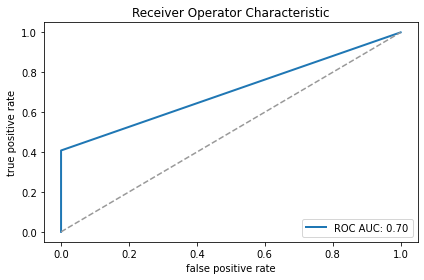

0.8264447652988596
0.987274904015663
0.7456663619457062
0.9984394608258946
0.7456663619457062
-------------------------------------


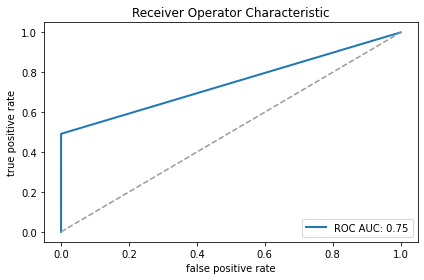

0.8240480349705437
0.9926672311279199
0.7416603575767171
0.9984322416778263
0.7416603575767172
-------------------------------------


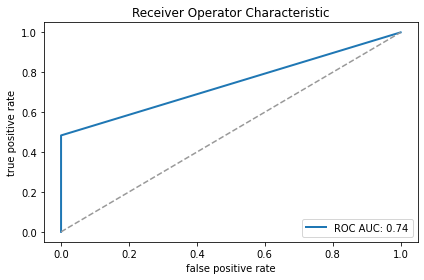

In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score



MLP_IG=[]
MLP_CC=[]
MLP_CT=[]

#Remove Least Important Features by Information Gain Feature Selection Method
df1=df.drop('isFlaggedFraud', 1)
df1=df.drop('type', 1)
df1=df.drop('newbalanceOrig', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x1 = df1.drop("isFraud",1)
# Input_ y_Target_Variable.
y1 = df1.isFraud

# Feature Scaling for input features.
x1=x1.to_numpy()
y1=y1.to_numpy()

#Remove Least Important Features by Correlation Coefficient Feature Selection Method
df2=df.drop('nameOrig', 1)
df2=df.drop('oldbalanceDest', 1)
df2=df.drop('newbalanceOrig', 1)
df2=df.drop('nameDest', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x2 = df2.drop("isFraud",1)
# Input_ y_Target_Variable.
y2 = df2.isFraud

# Feature Scaling for input features.
x2=x2.to_numpy()
y2=y2.to_numpy()


#Remove Least Important Features by Chi Square Test Feature Selection Method
df3=df.drop('nameOrig', 1)
df3=df.drop('newbalanceDest', 1)
df3=df.drop('type', 1)
df3=df.drop('step', 1)
df3=df.drop('isFlaggedFraud', 1)

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
# Input_x_Features.
x3 = df3.drop("isFraud",1)
# Input_ y_Target_Variable.
y3 = df3.isFraud

# Feature Scaling for input features.
x3=x3.to_numpy()
y3=y3.to_numpy()


# Input_x_Features.
#x = df.drop("isFraud",1)
# Input_ y_Target_Variable.
#y = df.isFraud
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=43)



scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)


from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=100)
mlp.fit(x_scaled,y_train)
pred=mlp.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)

print(f1_score(y_test, pred, average="macro"))
print(precision_score(y_test, pred, average="macro"))
print(recall_score(y_test, pred, average="macro"))
print(accuracy_score(y_test, pred))
print(auc(false_positive_rate, true_positive_rate))
MLP_IG.append(f1_score(y_test, pred, average="macro"))
MLP_IG.append(precision_score(y_test, pred, average="macro"))
MLP_IG.append(recall_score(y_test, pred, average="macro"))
MLP_IG.append(accuracy_score(y_test, pred))
MLP_IG.append(auc(false_positive_rate, true_positive_rate))
print("-------------------------------------")

# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()



X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=43)



scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)


from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=100)
mlp.fit(x_scaled,y_train)
pred=mlp.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)

print(f1_score(y_test, pred, average="macro"))
print(precision_score(y_test, pred, average="macro"))
print(recall_score(y_test, pred, average="macro"))
print(accuracy_score(y_test, pred))
print(auc(false_positive_rate, true_positive_rate))
MLP_CC.append(f1_score(y_test, pred, average="macro"))
MLP_CC.append(precision_score(y_test, pred, average="macro"))
MLP_CC.append(recall_score(y_test, pred, average="macro"))
MLP_CC.append(accuracy_score(y_test, pred))
MLP_CC.append(auc(false_positive_rate, true_positive_rate))
print("-------------------------------------")


# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=43)



scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)


from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=100)
mlp.fit(x_scaled,y_train)
pred=mlp.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)

print(f1_score(y_test, pred, average="macro"))
print(precision_score(y_test, pred, average="macro"))
print(recall_score(y_test, pred, average="macro"))
print(accuracy_score(y_test, pred))
print(auc(false_positive_rate, true_positive_rate))
MLP_CT.append(f1_score(y_test, pred, average="macro"))
MLP_CT.append(precision_score(y_test, pred, average="macro"))
MLP_CT.append(recall_score(y_test, pred, average="macro"))
MLP_CT.append(accuracy_score(y_test, pred))
MLP_CT.append(auc(false_positive_rate, true_positive_rate))
print("-------------------------------------")


# AUC score that summarizes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)
                  
    
plt.plot(false_positive_rate, true_positive_rate, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = '')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()



**T-Test Between Two Best Model**

In [ ]:
import numpy as np
# display test scores
def t_test(DTREE_ENTROPY_IG_score, DTREE_GINI_IG_score):
  string=""
  #Compute the difference between the results
  diff = [y - x for y, x in zip(DTREE_ENTROPY_IG_score, DTREE_GINI_IG_score)]
  #Comopute the mean of differences
  d_bar = np.mean(diff)
  #compute the variance of differences
  sigma2 = np.var(diff)
  #compute the number of data points used for training 
  n1 = 2493369
  #compute the number of data points used for testing 
  n2 = 277040
  #compute the total number of data points
  n = 2770409
  #compute the modified variance
  sigma2_mod = sigma2 * (1/n + n2/n1)
  #compute the t_static
  t_static =  d_bar / np.sqrt(sigma2_mod)
  from scipy.stats import t
  #Compute p-value and plot the results 
  Pvalue = ((1 - t.cdf(t_static, n-1))*200)
  
  if Pvalue>0.05:
    string += "p-value>0.05 so there's NO significant difference between models."
  else:
    string += "p-value<=0.05 so there's A significant difference between models." 
  return string,t_static,Pvalue

In [ ]:
# load data
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/t_test_sc.csv",header=None, 
                 index_col=False)
df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.902203,0.893898,0.905744,0.883135,0.900901,0.895968,0.885361,0.896418,0.889023,0.898302
1,0.991604,0.991295,0.988397,0.988131,0.988998,0.989628,0.990967,0.987075,0.988426,0.988875
2,0.840422,0.828851,0.847114,0.815447,0.839808,0.832501,0.817280,0.834323,0.823364,0.836154
3,0.999022,0.998953,0.999047,0.998863,0.999007,0.998968,0.998885,0.998968,0.998910,0.998986
4,0.840422,0.828851,0.847114,0.815447,0.839808,0.832501,0.817280,0.834323,0.823364,0.836154
5,0.895693,0.889310,0.902750,0.880449,0.900324,0.890685,0.880840,0.893212,0.885916,0.893034
6,0.986185,0.989328,0.985768,0.985267,0.987287,0.986757,0.988014,0.985186,0.985603,0.988622
7,0.833712,0.823366,0.844064,0.813006,0.839804,0.826406,0.812402,0.830665,0.820314,0.828846
8,0.998960,0.998914,0.999018,0.998838,0.999000,0.998921,0.998845,0.998939,0.998881,0.998942
9,0.833712,0.823366,0.844064,0.813006,0.839804,0.826406,0.812402,0.830665,0.820314,0.828846


In [ ]:
df_list = df.values.tolist()
print(df_list)


[[0.902202640947617, 0.893898241166345, 0.9057440689023636, 0.8831347403828056, 0.9009014688438036, 0.895967687095266, 0.8853607453278949, 0.8964175697702519, 0.8890229923105991, 0.8983017486768476], [0.9916036391348709, 0.991295126553924, 0.9883968150299028, 0.9881313466460748, 0.9889980466210504, 0.9896283569491504, 0.9909669600643, 0.9870747057535708, 0.9884258601532848, 0.9888752240481088], [0.8404221982848143, 0.8288509437172139, 0.8471141050607421, 0.8154472185007432, 0.8398077544325337, 0.8325014038043251, 0.8172796891496135, 0.8343230135452235, 0.8233643926785751, 0.8361536740427651], [0.9990218054367404, 0.9989532235300912, 0.9990470724549796, 0.998862984179237, 0.9990073671406038, 0.998967661826228, 0.998884641623442, 0.998967661826228, 0.9989099086416812, 0.9989857096963988], [0.8404221982848143, 0.8288509437172138, 0.8471141050607423, 0.8154472185007433, 0.8398077544325337, 0.8325014038043251, 0.8172796891496134, 0.8343230135452234, 0.8233643926785752, 0.8361536740427651], 

In [ ]:
#f1 score
t_test(df_list[0],df_list[5])

("p-value<=0.05 so there's A significant difference between models.",
 7.2228622946768155,
 5.091482790930968e-11)

In [ ]:
#precision score
t_test(df_list[1],df_list[6])

("p-value<=0.05 so there's A significant difference between models.",
 6.129260759394118,
 8.83001671780903e-08)

In [ ]:
#recall score
t_test(df_list[2],df_list[7])

("p-value<=0.05 so there's A significant difference between models.",
 6.018732092097544,
 1.758104772875413e-07)

In [ ]:
#accuracy score
t_test(df_list[3],df_list[8])

("p-value<=0.05 so there's A significant difference between models.",
 7.5616320046041725,
 3.9745984281580604e-12)

In [ ]:
#auc score
t_test(df_list[4],df_list[9])

("p-value<=0.05 so there's A significant difference between models.",
 6.018732092097659,
 1.758104772875413e-07)